In [12]:
require(ggplot2)
library(ggrepel)

Loading required package: ggplot2



In [13]:
setwd('/gpfs/group/home/salee/Spatial_CMP')

In [15]:

DEfile1 = paste0("Final_DE_SejongIn_celltype_FullROI_N_cellselection_N_Cardiomyocytes_ROI_large_Vent_LV_DsSelect_Non_N_OL_pcaplot_outlier_RE_PID_Institute_Fixation.interval_KR_Y2023-06-09", "conditionFB_conditionNo_Seg")
DEfile2 = paste0("Final_DE_SejongIn_celltype_FullROI_N_cellselection_N_Cardiomyocytes_ROI_large_Vent_LV_DsSelect_Non_N_OL_pcaplot_outlier_RE_PID_Institute_Fixation.interval_KR_Y2023-06-09", "conditionEC_conditionNo_Seg")
DEfile3 = paste0("Final_DE_SejongIn_celltype_FullROI_N_cellselection_N_Cardiomyocytes_ROI_large_Vent_LV_DsSelect_Non_N_OL_pcaplot_outlier_RE_PID_Institute_Fixation.interval_KR_Y2023-06-09","conditionCMC_conditionNo_Seg")
DEfile4 = paste0("Final_DE_SejongIn_celltype_FullROI_N_cellselection_N_Cardiomyocytes_ROI_large_Vent_LV_DsSelect_Non_N_OL_pcaplot_outlier_RE_PID_Institute_Fixation.interval_KR_Y2023-06-09","conditionFB_conditionCMC")
DEfile5 = paste0("Final_DE_SejongIn_celltype_FullROI_N_cellselection_N_Cardiomyocytes_ROI_large_Vent_LV_DsSelect_Non_N_OL_pcaplot_outlier_RE_PID_Institute_Fixation.interval_KR_Y2023-06-09","conditionEC_conditionCMC")
DEfile6 = paste0("Final_DE_SejongIn_celltype_FullROI_N_cellselection_N_Cardiomyocytes_ROI_large_Vent_LV_DsSelect_Non_N_OL_pcaplot_outlier_RE_PID_Institute_Fixation.interval_KR_Y2023-06-09","conditionFB_conditionEC")
DEfile7 = paste0("Final_DE_SejongIn_celltype_FullROI_N_cellselection_N_Cardiomyocytes_ROI_large_Vent_LV_DsSelect_Non_N_OL_pcaplot_outlier_RE_PID_Institute_Fixation.interval_KR_Y2023-06-09","conditionFB_(conditionEC+conditionCMC)2")
DEfile8 = paste0("Final_DE_SejongIn_celltype_FullROI_N_cellselection_N_Cardiomyocytes_ROI_large_Vent_LV_DsSelect_Non_N_OL_pcaplot_outlier_RE_PID_Institute_Fixation.interval_KR_Y2023-06-09","conditionEC_(conditionCMC+conditionFB)2")
DEfile9 = paste0("Final_DE_SejongIn_celltype_FullROI_N_cellselection_N_Cardiomyocytes_ROI_large_Vent_LV_DsSelect_Non_N_OL_pcaplot_outlier_RE_PID_Institute_Fixation.interval_KR_Y2023-06-09","conditionCMC_(conditionEC+conditionFB)2")


In [16]:
DE1 <- read.csv(file.path(getwd(), "results", paste0(DEfile1, ".csv")), row.names = 1, header = TRUE, stringsAsFactors=FALSE)
DE2 <- read.csv(file.path(getwd(), "results", paste0(DEfile2, ".csv")), row.names = 1, header = TRUE, stringsAsFactors=FALSE)
DE3 <- read.csv(file.path(getwd(), "results", paste0(DEfile3, ".csv")), row.names = 1, header = TRUE, stringsAsFactors=FALSE)
DE4 <- read.csv(file.path(getwd(), "results", paste0(DEfile4, ".csv")), row.names = 1, header = TRUE, stringsAsFactors=FALSE)
DE5 <- read.csv(file.path(getwd(), "results", paste0(DEfile5, ".csv")), row.names = 1, header = TRUE, stringsAsFactors=FALSE)
DE6 <- read.csv(file.path(getwd(), "results", paste0(DEfile6, ".csv")), row.names = 1, header = TRUE, stringsAsFactors=FALSE)
DE7 <- read.csv(file.path(getwd(), "results", paste0(DEfile7, ".csv")), row.names = 1, header = TRUE, stringsAsFactors=FALSE)
DE8 <- read.csv(file.path(getwd(), "results", paste0(DEfile8, ".csv")), row.names = 1, header = TRUE, stringsAsFactors=FALSE)
DE9 <- read.csv(file.path(getwd(), "results", paste0(DEfile9, ".csv")), row.names = 1, header = TRUE, stringsAsFactors=FALSE)


In [17]:
DE1$COI <- "FB vs No_Seg"
DE2$COI <- "EC vs No_Seg"
DE3$COI <- "CMC vs No_Seg"
DE4$COI <- "FB vs CMC"
DE5$COI <- "EC vs CMC"
DE6$COI <- "FB vs EC"
DE7$COI <- "FB vs Oth"
DE8$COI <- "EC vs Oth"
DE9$COI <- "CMC vs Oth"

In [18]:
DE1$Index <- 1:nrow(DE1)
DE2$Index <- 1:nrow(DE2)
DE3$Index <- 1:nrow(DE3)
DE4$Index <- 1:nrow(DE4)
DE5$Index <- 1:nrow(DE5)
DE6$Index <- 1:nrow(DE6)
DE7$Index <- 1:nrow(DE7)
DE8$Index <- 1:nrow(DE8)
DE9$Index <- 1:nrow(DE9)

In [19]:
DE_Noseg<-rbind(DE1, DE2, DE3)
DE_eachcell<-rbind(DE4, DE5, DE6)
DE_othercell<-rbind(DE7, DE8, DE9)
DE_total <- rbind(DE_Noseg, DE_eachcell, DE_othercell)

In [22]:
DE_total$diffexpressed <- "NO"
DE_total$diffexpressed[DE_total$logFC > 0 & DE_total$adj.P.Val < 0.05] <- "UP"
DE_total$diffexpressed[DE_total$logFC < 0 & DE_total$adj.P.Val < 0.05] <- "DOWN"
DE_total$delabel <- NA
DE_total$delabel[DE_total$diffexpressed != "NO" & DE_total$Index %in% c(1:5)] <- DE_total$SYMBOL[DE_total$diffexpressed != "NO" & DE_total$Index %in% c(1:5)]
DE_total$COI <- factor(DE_total$COI, levels=c("CMC vs No_Seg", "EC vs No_Seg", "FB vs No_Seg"
                                              , "EC vs CMC","FB vs CMC", "FB vs EC"
                                              , "CMC vs Oth", "EC vs Oth", "FB vs Oth")
                       )


In [36]:
head(DE_total)

,SYMBOL,ENTREZID,GENENAME,logFC,AveExpr,t,P.Value,adj.P.Val,B,z.std,COI,Index,diffexpressed,delabel
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<chr>,<chr>
CFH,CFH,3075,complement factor H,2.418706,6.555313,18.85672,1.605814e-78,2.055442e-74,83.20913,18.75994,FB vs No_Seg,1,UP,CFH
MXRA8,MXRA8,54587,matrix remodeling associated 8,2.209730,5.903895,18.76224,1.258759e-77,8.056056e-74,83.82800,18.65017,FB vs No_Seg,2,UP,MXRA8
COL6A2,COL6A2,1292,collagen type VI alpha 2 chain,2.395693,7.729400,17.04044,2.208619e-64,9.423440e-61,70.55991,16.94190,FB vs No_Seg,3,UP,COL6A2
COL6A1,COL6A1,1291,collagen type VI alpha 1 chain,2.250268,8.217865,16.80309,1.358546e-62,4.347348e-59,68.94482,16.69786,FB vs No_Seg,4,UP,NA
COL6A3,COL6A3,1293,collagen type VI alpha 3 chain,2.434396,6.921640,16.59945,2.548520e-61,6.524211e-58,68.14164,16.52199,FB vs No_Seg,5,UP,NA
NBPF12,NBPF12,149013,NBPF member 12,1.426392,6.903959,16.26623,6.252999e-59,1.333973e-55,65.49996,16.18677,FB vs No_Seg,6,UP,NA


In [49]:
DE_total$diffexpressed <- "NO"
DE_total$diffexpressed[DE_total$logFC > 0 & DE_total$adj.P.Val < 0.05] <- "UP"
DE_total$diffexpressed[DE_total$logFC < 0 & DE_total$adj.P.Val < 0.05] <- "DOWN"
DE_total$delabel <- NA
for (i in c("CMC vs No_Seg", "EC vs No_Seg", "FB vs No_Seg"
                                              , "EC vs CMC","FB vs CMC", "FB vs EC"
                                              , "CMC vs Oth", "EC vs Oth", "FB vs Oth")){
DE_total$delabel[DE_total$diffexpressed == "UP" & DE_total$COI == i][1:3] <- DE_total$SYMBOL[DE_total$diffexpressed == "UP" & DE_total$COI == i][1:3]
DE_total$delabel[DE_total$diffexpressed == "DOWN" & DE_total$COI == i][1:3] <- DE_total$SYMBOL[DE_total$diffexpressed == "DOWN" & DE_total$COI == i][1:3]
}
DE_total$COI <- factor(DE_total$COI, levels=c("CMC vs No_Seg", "EC vs No_Seg", "FB vs No_Seg"
                                              , "EC vs CMC","FB vs CMC", "FB vs EC"
                                              , "CMC vs Oth", "EC vs Oth", "FB vs Oth")
                       )


In [50]:
DE_total$delabel[DE_total$diffexpressed == "UP"][1:3] 

[1] "CFH"    "MXRA8"  "COL6A2"

In [69]:
options(repr.plot.width=18, repr.plot.height=5
       )


## Figure 2K

Warning message in geom_text_repel(size = 4, max.overlap = 3, point.padding = 0.2, :
“Ignoring unknown parameters: `max.overlap` and
`min.segment.lengthmin.segment.length`”
Warning message:
“Removed 115146 rows containing missing values (`geom_text_repel()`).”
Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


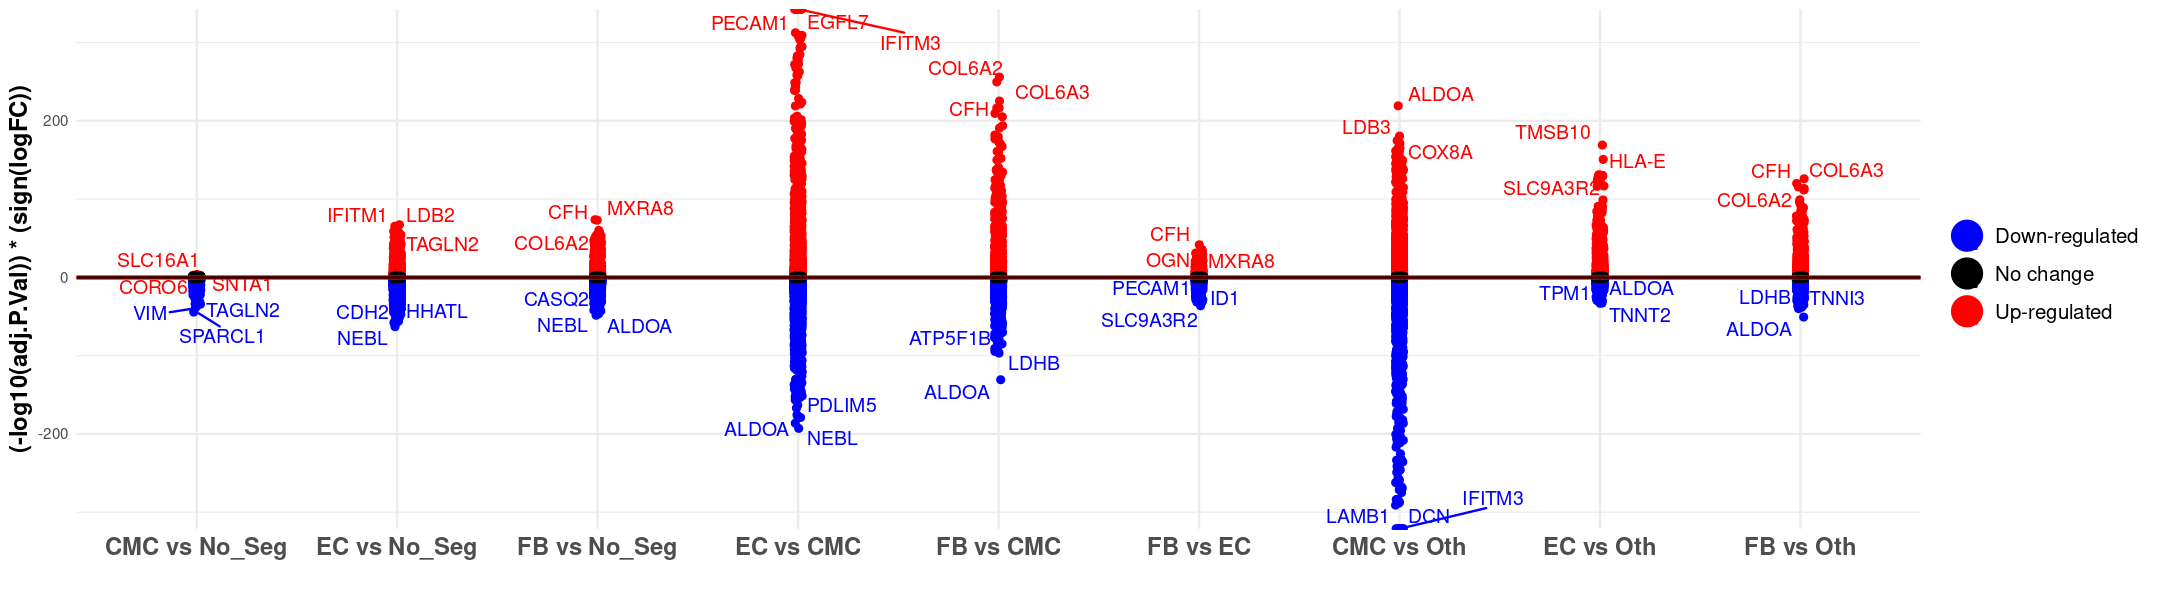

In [70]:
ggplot(data=DE_total, aes(x=COI, y=(-log10(adj.P.Val))*(sign(logFC)), col=diffexpressed, label=delabel)) +
geom_jitter(width=0.02) +
theme_minimal() +
geom_text_repel(size=4, max.overlap=3, point.padding=0.2, min.segment.lengthmin.segment.length=0.2)+
scale_color_manual(values=c("blue", "black", "red"), labels=c('Down-regulated', 'No change', 'Up-regulated')) +
geom_hline(yintercept=c(-log10(0.05), log10(0.05)), col="red") +
geom_hline(yintercept=0, col="black") + 
theme(axis.text.x=element_text(size=14,face="bold"),
        axis.title=element_text(size=14,face="bold"),
     legend.title=element_blank(),
     legend.text = element_text(size=12),
     ) +
xlab("") +
guides(color = guide_legend(override.aes = list(size = 8))) 